<a href="https://colab.research.google.com/github/seongwoojang1123/Systemic-Review/blob/main/260116_systemic_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

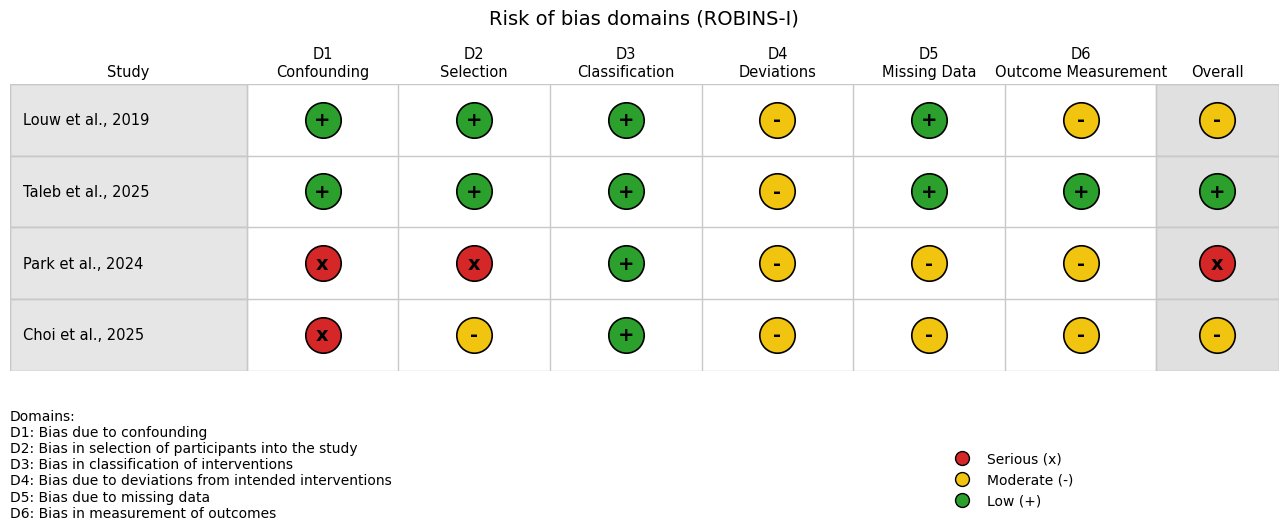

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches

# ----------------------------
# 1) 입력 데이터
# ----------------------------
data = [
    ["Louw et al., 2019",  "Low",     "Low",     "Low",     "Some",    "Low",     "Some",    "Some"],
    ["Taleb et al., 2025", "Low",     "Low",     "Low",     "Some",    "Low",     "Low",     "Low"],
    ["Park et al., 2024",  "Serious", "Serious", "Low",     "Some",    "Some",    "Some",    "Serious"],
    ["Choi et al., 2025",  "Serious", "Some",    "Low",     "Some",    "Some",    "Some",    "Some"],
]
cols = ["Study", "D1", "D2", "D3", "D4", "D5", "D6", "Overall"]
df = pd.DataFrame(data, columns=cols)

domains = ["D1","D2","D3","D4","D5","D6","Overall"]

short_header = {
    "D1": "Confounding",
    "D2": "Selection",
    "D3": "Classification",
    "D4": "Deviations",
    "D5": "Missing Data",
    "D6": "Outcome Measurement",
    "Overall": "Overall",
}

domain_desc = {
    "D1": "Bias due to confounding",
    "D2": "Bias in selection of participants into the study",
    "D3": "Bias in classification of interventions",
    "D4": "Bias due to deviations from intended interventions",
    "D5": "Bias due to missing data",
    "D6": "Bias in measurement of outcomes",
}

# ----------------------------
# 2) 등급 -> (기호, 색) 매핑
# ----------------------------
MAP = {
    "Low":      {"symbol": "+", "color": "#2ca02c", "label": "Low"},
    "Some":     {"symbol": "-", "color": "#f1c40f", "label": "Moderate"},
    "Moderate": {"symbol": "-", "color": "#f1c40f", "label": "Moderate"},
    "Serious":  {"symbol": "x", "color": "#d62728", "label": "Serious"},
    "Critical": {"symbol": "!", "color": "#8B0000", "label": "Critical"},
    "NI":       {"symbol": "?", "color": "#7f7f7f", "label": "No information"},
}

# ==========================================================
# A) 표 레이아웃
# ==========================================================
STUDY_COL_W   = 3.2
DOMAIN_COL_W  = 2.05
OVERALL_COL_W = 1.65
CELL_H        = 1.00

STUDY_FONT_SIZE  = 10.5
HEADER_FONT_SIZE = 10.5
TITLE_FONT_SIZE  = 14

STUDY_PAD_X   = 0.18
GRID_COLOR    = "#c8c8c8"
STUDY_BG      = "#e6e6e6"

# ✅ Overall "칸" 음영 회색 (셀 배경)
OVERALL_CELL_BG = "#e0e0e0"

CIRCLE_SIZE   = 650
SYMBOL_SIZE   = 14

# ==========================================================
# B) 하단 Domains + 범례 위치
# ==========================================================
BOTTOM_MARGIN = 0.30   # 하단 여백
RIGHT_MARGIN  = 0.82

SUBPLOT_LEFT  = 0.04
SUBPLOT_RIGHT = RIGHT_MARGIN

FOOT_FONT_SIZE = 10
FOOT_Y = 0.02

# 하단 2컬럼 배치(이미지처럼: Domains 왼쪽 넓게, 범례 오른쪽)
FOOT_COLS_LEFT_RATIO = 0.73

# ----------------------------
# 3) 가변 폭 격자 좌표 계산
# ----------------------------
studies = df["Study"].tolist()
n_rows = len(studies)

col_widths = [STUDY_COL_W] + [DOMAIN_COL_W]*6 + [OVERALL_COL_W]
x_edges = [0.0]
for w in col_widths:
    x_edges.append(x_edges[-1] + w)
x_centers = [(x_edges[i] + x_edges[i+1]) / 2 for i in range(len(col_widths))]

y_edges = [i * CELL_H for i in range(n_rows + 1)]
y_centers = [i * CELL_H + CELL_H/2 for i in range(n_rows)]

# ----------------------------
# 4) Figure + Axes
# ----------------------------
fig_w = 0.82 * sum(col_widths) + 2.2
fig_h = 0.78 * n_rows + 2.2
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

ax.set_xlim(x_edges[0], x_edges[-1])
ax.set_ylim(y_edges[0], y_edges[-1])
ax.invert_yaxis()

# 격자선
for xe in x_edges:
    ax.axvline(xe, color=GRID_COLOR, linewidth=1)
for ye in y_edges:
    ax.axhline(ye, color=GRID_COLOR, linewidth=1)

# ----------------------------
# 4-1) Study 컬럼 배경 + 텍스트
# ----------------------------
for i, s in enumerate(studies):
    rect = patches.Rectangle(
        (x_edges[0], y_edges[i]),
        width=STUDY_COL_W, height=CELL_H,
        facecolor=STUDY_BG, edgecolor=GRID_COLOR, linewidth=1, zorder=0
    )
    ax.add_patch(rect)

    ax.text(
        x_edges[0] + STUDY_PAD_X, y_centers[i],
        s, ha="left", va="center", fontsize=STUDY_FONT_SIZE, zorder=2
    )

# ----------------------------
# ✅ 4-2) Overall 열 "칸" 음영(배경 셀 회색) 추가
#     - 원/기호는 그대로 위에 그려짐
# ----------------------------
overall_col_index = 1 + domains.index("Overall")  # 0=Study, 1=D1 ...
overall_x0 = x_edges[overall_col_index]
overall_w  = x_edges[overall_col_index + 1] - x_edges[overall_col_index]

for i in range(n_rows):
    rect = patches.Rectangle(
        (overall_x0, y_edges[i]),
        width=overall_w, height=CELL_H,
        facecolor=OVERALL_CELL_BG, edgecolor=GRID_COLOR, linewidth=1, zorder=0.5
    )
    ax.add_patch(rect)

# ----------------------------
# 4-3) 도메인 원 + 기호 (Overall도 색 규칙은 동일)
# ----------------------------
for i in range(n_rows):
    for k, dom in enumerate(domains):
        x = x_centers[1 + k]
        y = y_centers[i]

        val = str(df.loc[i, dom]).strip()
        if val not in MAP:
            val = "NI"

        ax.scatter(
            x, y, s=CIRCLE_SIZE, c=MAP[val]["color"],
            edgecolors="black", linewidths=1.2, zorder=3
        )
        ax.text(
            x, y, MAP[val]["symbol"],
            ha="center", va="center",
            fontsize=SYMBOL_SIZE, fontweight="bold", zorder=4
        )

# ----------------------------
# 4-4) 헤더(위쪽)
# ----------------------------
headers = ["Study"] + [f"{d}\n{short_header[d]}" if d != "Overall" else "Overall" for d in domains]
ax.set_xticks(x_centers)
ax.set_xticklabels(headers, fontsize=HEADER_FONT_SIZE)
ax.xaxis.tick_top()
ax.tick_params(axis="x", length=0)

ax.set_yticks([])
ax.tick_params(axis="y", length=0)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Risk of bias domains (ROBINS-I)", fontsize=TITLE_FONT_SIZE, pad=16)

# ----------------------------
# 5) 하단: Domains(왼쪽) + 범례(오른쪽)
# ----------------------------
plt.subplots_adjust(bottom=BOTTOM_MARGIN, right=RIGHT_MARGIN, top=0.84, left=SUBPLOT_LEFT)

# Domains 텍스트(이미지 순서대로 한 줄씩)
foot_lines = ["Domains:"]
for d in ["D1","D2","D3","D4","D5","D6"]:
    foot_lines.append(f"{d}: {domain_desc[d]}")
foot_text = "\n".join(foot_lines)

usable_w = SUBPLOT_RIGHT - SUBPLOT_LEFT
foot_left_x  = SUBPLOT_LEFT
foot_right_x = SUBPLOT_LEFT + usable_w * FOOT_COLS_LEFT_RATIO

fig.text(
    foot_left_x, FOOT_Y, foot_text,
    ha="left", va="bottom",
    fontsize=FOOT_FONT_SIZE
)

# 범례: Domains 오른쪽에 (이미지처럼)
legend_handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Serious"]["color"], markeredgecolor='black',
           markersize=10, label="Serious (x)"),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Moderate"]["color"], markeredgecolor='black',
           markersize=10, label="Moderate (-)"),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=MAP["Low"]["color"], markeredgecolor='black',
           markersize=10, label="Low (+)"),
]

fig.legend(
    handles=legend_handles,
    loc="lower left",
    bbox_to_anchor=(foot_right_x, FOOT_Y),
    frameon=False,
    fontsize=FOOT_FONT_SIZE
)

plt.savefig("robins_i_symbols_final.png", dpi=300, bbox_inches="tight")
plt.show()


=== Domain-wise risk distribution (%) ===
           Low  Moderate  Serious   NI
D1        50.0       0.0     50.0  0.0
D2        50.0      25.0     25.0  0.0
D3       100.0       0.0      0.0  0.0
D4         0.0     100.0      0.0  0.0
D5        50.0      50.0      0.0  0.0
D6        25.0      75.0      0.0  0.0
Overall   25.0      50.0     25.0  0.0


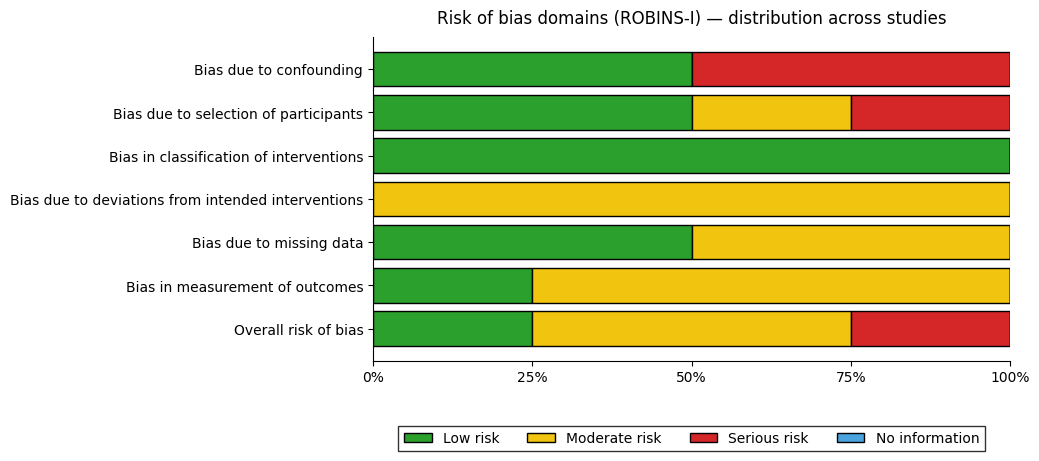

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# =========================================================
# 1) Table 2 입력 (네 데이터 그대로)
# =========================================================
data = [
    ["Louw et al., 2019",  "Low",     "Low",     "Low",     "Some",    "Low",     "Some",    "Some"],
    ["Taleb et al., 2025", "Low",     "Low",     "Low",     "Some",    "Low",     "Low",     "Low"],
    ["Park et al., 2024",  "Serious", "Serious", "Low",     "Some",    "Some",    "Some",    "Serious"],
    ["Choi et al., 2025",  "Serious", "Some",    "Low",     "Some",    "Some",    "Some",    "Some"],
]
cols = ["Study", "D1", "D2", "D3", "D4", "D5", "D6", "Overall"]
df = pd.DataFrame(data, columns=cols)

domains = ["D1","D2","D3","D4","D5","D6","Overall"]

# =========================================================
# 2) 등급 정규화(표에 Some이 있으면 Moderate로 통일)
# =========================================================
def normalize_grade(x):
    if pd.isna(x):
        return "NI"
    s = str(x).strip().lower()
    if s == "low":
        return "Low"
    if s in ["some", "moderate", "some concerns", "some_concerns"]:
        return "Moderate"
    if s in ["serious", "high"]:
        return "Serious"
    if s in ["critical"]:
        return "Critical"
    if s in ["ni", "no information", "no_info", "unknown", "?"]:
        return "NI"
    return "NI"

# Figure B에서 보여줄 카테고리 순서 (논문 B 스타일)
cats = ["Low", "Moderate", "Serious", "NI"]  # 필요하면 "Critical" 추가 가능

# 색상(논문 느낌)
color_map = {
    "Low": "#2ca02c",       # green
    "Moderate": "#f1c40f",  # yellow
    "Serious": "#d62728",   # red
    "NI": "#4aa3df",        # blue
    "Critical": "#8B0000",
}

domain_label = {
    "D1": "Bias due to confounding",
    "D2": "Bias due to selection of participants",
    "D3": "Bias in classification of interventions",
    "D4": "Bias due to deviations from intended interventions",
    "D5": "Bias due to missing data",
    "D6": "Bias in measurement of outcomes",
    "Overall": "Overall risk of bias",
}

# =========================================================
# 3) 도메인별 비율(%) 계산
# =========================================================
pct = pd.DataFrame(index=domains, columns=cats, data=0.0)

for d in domains:
    vals = df[d].apply(normalize_grade)
    total = len(vals)
    vc = vals.value_counts(dropna=False)
    for c in cats:
        pct.loc[d, c] = (vc.get(c, 0) / total) * 100.0

# 콘솔에 비율표 출력(확인용)
print("=== Domain-wise risk distribution (%) ===")
print(pct.round(1))

# =========================================================
# 4) Figure B: 100% 누적 가로막대
# =========================================================
fig, ax = plt.subplots(figsize=(10.5, 4.8))

y = np.arange(len(domains))
left = np.zeros(len(domains))

for c in cats:
    ax.barh(
        y=y,
        width=pct[c].values,
        left=left,
        color=color_map[c],
        edgecolor="black",
        linewidth=1
    )
    left += pct[c].values

# y 라벨
ax.set_yticks(y)
ax.set_yticklabels([domain_label[d] for d in domains], fontsize=10)
ax.invert_yaxis()

# x축
ax.set_xlim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels([f"{t}%" for t in [0, 25, 50, 75, 100]])

ax.set_title("Risk of bias domains (ROBINS-I) — distribution across studies", fontsize=12, pad=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 범례(논문처럼 아래 박스)
legend_handles = [
    Patch(facecolor=color_map["Low"], edgecolor="black", label="Low risk"),
    Patch(facecolor=color_map["Moderate"], edgecolor="black", label="Moderate risk"),
    Patch(facecolor=color_map["Serious"], edgecolor="black", label="Serious risk"),
    Patch(facecolor=color_map["NI"], edgecolor="black", label="No information"),
]
leg = ax.legend(
    handles=legend_handles,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=4,
    frameon=True,
    fancybox=False,
    edgecolor="black",
    fontsize=10
)

plt.tight_layout()
plt.savefig("FigB_ROBINS_domain_percent.png", dpi=300, bbox_inches="tight")
plt.show()


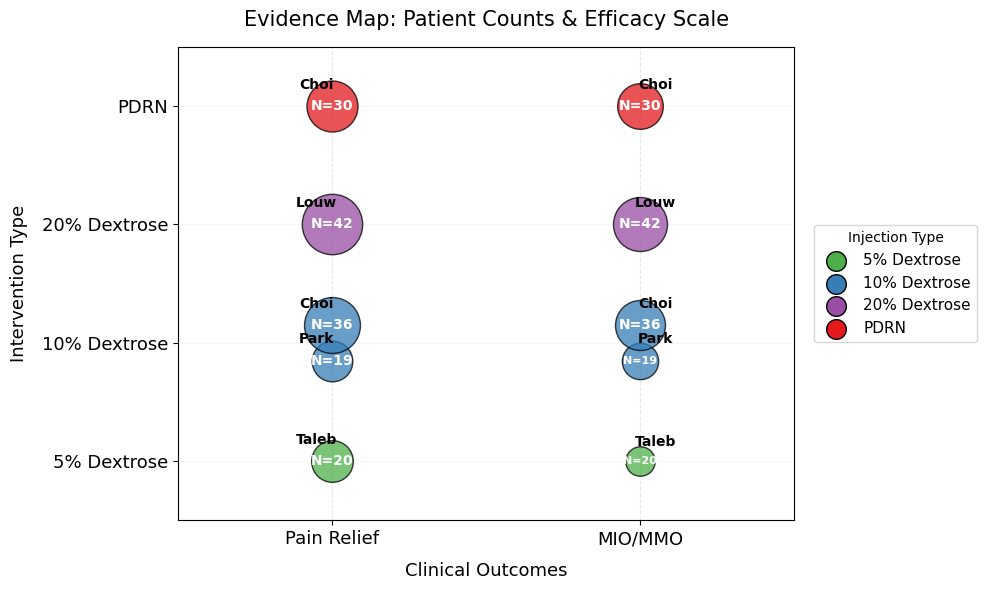

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================================
# 1. 데이터 입력 (가중치 Weight 유지)
# ================================
data = [
    # Study, Intervention, Outcome, N, Weight
    ["Taleb 2025", "5% Dextrose",  "Pain Relief", 20, 1.0],
    ["Taleb 2025", "5% Dextrose",  "MIO/MMO",     20, 0.5], # N=20 (작은 원)

    ["Park 2024",  "10% Dextrose", "Pain Relief", 19, 1.0],
    ["Park 2024",  "10% Dextrose", "MIO/MMO",     19, 0.8], # N=19 (중간 원)

    ["Choi 2025",  "10% Dextrose", "Pain Relief", 36, 1.0],
    ["Choi 2025",  "10% Dextrose", "MIO/MMO",     36, 0.8],

    ["Choi 2025",  "PDRN",         "Pain Relief", 30, 1.0],
    ["Choi 2025",  "PDRN",         "MIO/MMO",     30, 0.8],

    ["Louw 2019",  "20% Dextrose", "Pain Relief", 42, 1.0],
    ["Louw 2019",  "20% Dextrose", "MIO/MMO",     42, 0.8]
]

df = pd.DataFrame(data, columns=["Study", "Intervention", "Outcome", "N", "Weight"])

# ================================
# 2. 좌표 및 오프셋 설정
# ================================
intervention_order = ["5% Dextrose", "10% Dextrose", "20% Dextrose", "PDRN"]
outcome_order = ["Pain Relief", "MIO/MMO"]

y_map = {v: i for i, v in enumerate(intervention_order)}
x_map = {v: i for i, v in enumerate(outcome_order)}

df["y_base"] = df["Intervention"].map(y_map)
df["x"] = df["Outcome"].map(x_map)

# 겹침 방지 오프셋
def apply_offset(row):
    if row["Intervention"] == "10% Dextrose":
        if "Park" in row["Study"]: return -0.15
        elif "Choi" in row["Study"]: return 0.15
    return 0

df["y_offset"] = df.apply(apply_offset, axis=1)
df["y_final"] = df["y_base"] + df["y_offset"]

# ================================
# 3. 시각화 (글자 크기 조정 포함)
# ================================
plt.figure(figsize=(10, 6))

colors = {
    "5% Dextrose": "#4daf4a",
    "10% Dextrose": "#377eb8",
    "20% Dextrose": "#984ea3",
    "PDRN": "#e41a1c"
}

for _, r in df.iterrows():
    # 원 크기 (가중치 적용)
    size = r["N"] * 45 * r["Weight"]

    plt.scatter(
        r["x"], r["y_final"],
        s=size,
        color=colors[r["Intervention"]],
        edgecolor="black",
        alpha=0.75,
        zorder=2
    )

    # 텍스트 크기 조정 로직 (N=19, N=20 & MIO/MMO 인 경우)
    if r["Outcome"] == "MIO/MMO" and r["N"] in [19, 20]:
        n_fontsize = 8  # 작게 (Small)
    else:
        n_fontsize = 10 # 기본 (Normal)

    plt.text(r["x"], r["y_final"], f"N={r['N']}",
             ha="center", va="center",
             fontsize=n_fontsize, fontweight="bold", color="white", zorder=3)

    # 연구 이름 라벨링
    text_offset = 0.15 if r["Outcome"] == "Pain Relief" else -0.15
    y_text_adj = 0.1 if r["Weight"] < 0.8 else 0.12

    plt.text(r["x"] - text_offset/3, r["y_final"] + y_text_adj, r["Study"].split()[0],
             ha="center", va="bottom", fontsize=10, color="black", fontweight="bold", zorder=3)

# 축 및 레이아웃
plt.xticks(list(x_map.values()), list(x_map.keys()), fontsize=13)
plt.yticks(list(y_map.values()), list(y_map.keys()), fontsize=13)

plt.ylim(-0.5, 3.5)
plt.xlim(-0.5, 1.5)

plt.xlabel("Clinical Outcomes", fontsize=13, labelpad=10)
plt.ylabel("Intervention Type", fontsize=13, labelpad=10)
plt.title("Evidence Map: Patient Counts & Efficacy Scale", fontsize=15, pad=15)

plt.grid(axis="x", linestyle="--", alpha=0.3, zorder=0)
plt.grid(axis="y", linestyle="-", alpha=0.1, zorder=0)

handles = [plt.scatter([], [], s=200, color=colors[k], edgecolor="black", label=k) for k in intervention_order]
plt.legend(handles=handles, title="Injection Type", loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=11)

plt.tight_layout()
plt.show()